<a href="https://colab.research.google.com/github/ShefikaBenjaminH/215008065.github.io/blob/main/Portfolio_Optmization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
df = pd.read_csv("drive/MyDrive/Portfolio diversification/all_stocks_5yr.csv")

In [3]:
df["Name"]=df["Name"].str.strip()

In [4]:
remove_d = dict(df.groupby(["Name"]).count()["close"].sort_values())
list1 = []
for i,v in remove_d.items():
  if v < 1259:
    list1.append(i)
  else:
    pass

In [5]:
list1_array = np.array(list1)
list1_array.shape

(35,)

In [6]:
df_even = df.set_index("Name").drop(list1_array)
df_even.head()

,date,open,high,low,close,volume
Name,,,,,,
AAL,2013-02-08,15.07,15.12,14.63,14.75,8407500
AAL,2013-02-11,14.89,15.01,14.26,14.46,8882000
AAL,2013-02-12,14.45,14.51,14.10,14.27,8126000
AAL,2013-02-13,14.30,14.94,14.25,14.66,10259500
AAL,2013-02-14,14.94,14.96,13.16,13.99,31879900


In [7]:
df_even.index.unique()

Index(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM',
       ...
       'XLNX', 'XL', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS'],
      dtype='object', name='Name', length=470)

In [8]:
stock_l = list(df_even.index.unique())
#stock_l

In [9]:
datafr_stocks = pd.DataFrame()
for name, group in df_even.groupby(["Name"]):
  for i in stock_l:
    ind_ = int(stock_l.index(i))
    if i == name:
      colum1 = df_even.groupby(["Name"]).get_group(i)["close"].values
      datafr_stocks[i] = colum1
    else:
      pass

<ipython-input-9-f1dba551e2af>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  datafr_stocks[i] = colum1


In [10]:
datafr_stocks.index = df[df.Name == "A"].date.values

In [11]:
datafr_stocks.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,...,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,...,28.31,37.46,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,...,28.41,37.58,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,...,28.42,37.80,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,...,28.22,38.44,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27


#**Portfolio Optimization with Python using Efficient Frontier with Practical Examples**

**1. What is portfolio optimization?**


Portfolio optimization is the process of creating a portfolio of assets, for which your investment has the maximum return and minimum risk

**2. What does a portfolio mean?**

An investor’s portfolio basically is his/her investment in different kinds of assets from different companies.

For example, if you have investments in 3 companies, say, Google, Amazon and Tesla, then these 3 companies make up your investment portfolio.

But how do you invest in a company? You do so by purchasing assets of that company.

**3. What are assets, returns and risk?**

**Assets** are of various kinds. An asset is what you would purchase if you want to invest in a company.

These include, but are not limited to:

Bonds
Stocks
Cash
Real Estate

Usually when you build a portfolio, it is advisable to diversify your assets, or purchase different kinds of assets from different companies. For all assets, you will get a profit after a specified period of time. However, the profit may not be the same for each investment you make.

This profit is what we call **returns**.


Another aspect of risk is **the fluctuations in the asset value**. For certain assets, its value is highly volatile, that is, the value increases when the market goes up, and drops accordingly. Whereas certain other assets, like bonds and certain steady stocks, are relatively more resistant to market conditions, but may give lesser returns compared to high risk ones.


A good portfolio is one which gives us maximum return on our investment for minimum risk, as discussed earlier.

**4. Modern Portfolio Theory (MPT)**

Modern Portfolio Theory, or also known as mean-variance analysis is a mathematical process which allows the user to maximize returns for a given risk level.


MPT assumes that all investors are risk-averse, i.e, if there is a choice between low risk and high risk portfolios with the same returns, an investor will choose one with the low risk.


MPT encourages diversification of assets. It says that a high variance asset A if combined with diverse assets B and C, where A, B and C have little to no correlation, can give us a portfolio with low variance on returns.

This is the crux of the Modern Portfolio Theory.

**5. What is Efficient Frontier?**

Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the highest expected return for a given risk level or the lowest risk for a given level of expected return.

Portfolios that lie outside the efficient frontier are sub-optimal because they do not provide either enough return for the level of risk or have a higher risk for the defined rate of return.

**6. Fundamental terms in portfolio optimization**


There are some statistical terms required in optimization process without which an optimal portfolio can’t be defined.

In [12]:
#Step 1: Pull the stock price data

#This data consist of Adj Close for 2 stocks

test = datafr_stocks[["AAL","AAP"]]
test

,AAL,AAP
2013-02-08,14.75,78.90
2013-02-11,14.46,78.39
2013-02-12,14.27,78.60
2013-02-13,14.66,78.97
2013-02-14,13.99,78.84
...,...,...
2018-02-01,53.88,117.29
2018-02-02,52.10,113.93
2018-02-05,49.76,109.86
2018-02-06,51.18,112.20


In [13]:
#Step 2: Calculate percentage change in stock prices

Next, we calculate the percentage change in stock prices of tesla everyday. You will notice that that we take the log of percentage change.


**But take log?**


The reason for this is that log of the returns is time additive.


**That is,**

If r13 is the returns for time between t3 and t1.
r12 is the returns between t1 and t2 and
r23 is the returns between t2 and t3.


Then, log(r13) = log(r12) + log(r23)


**For example:**,
If p1 = 100, p2 = 110 and p3 = 120,
where p1 is price of stock in time 1


**Then:**

log(r12) = ln(p2/p1) = ln(110/100) = 9.53%,


log(r23) = ln(120/110) = 8.7% and


log(r13) = log(r12) + log(r23) = 9.53 + 8.7 = 18.23%, which is same as ln(120/100).



This means a log change of +0.1 today and then -0.1 tomorrow will give you the same value of stock as yesterday. This is** not true** if you simply **compute** **percentage change**.



It is **common practice** in portfolio optimization to take **log of returns** for calculations of **covariance and correlation.**

In [14]:
# Log of percentage change

American_A_L = test['AAL'].pct_change().apply(lambda x: np.log(1+x))
American_A_L.head()

2013-02-08         NaN
2013-02-11   -0.019857
2013-02-12   -0.013227
2013-02-13    0.026963
2013-02-14   -0.046780
Name: AAL, dtype: float64

**Variance**

The variance in prices of stocks of stocks are an important indicator of how volatile this investment will be (how returns can fluctuate).

It can be calculated for each company by using built in .var() function. Under the hood, the formula implemented by this function is given by:

In [15]:
American_A_L_var = American_A_L.var()
American_A_L_var

0.0005059335368702489

In [16]:
#Doing the same to American Academy of Pediatrics

American_A_P = test["AAP"].pct_change().apply(lambda x: np.log(1+x))
American_A_P.head()

2013-02-08         NaN
2013-02-11   -0.006485
2013-02-12    0.002675
2013-02-13    0.004696
2013-02-14   -0.001648
Name: AAP, dtype: float64

In [17]:
#variance
American_A_P_var = American_A_P.var()
American_A_P_var

0.000360697213181073

**Volatility**

Volatility is measured as the standard deviation of a company’s stock.

If you carefully look at the formula for standard deviation, you will understand that it is just the square root of variance.

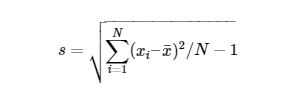



But volatility for the annual standard deviation. What we get from square root of variance is the daily standard deviation. To convert it to annual standard deviation we multiply the variance by 250.

250 is used because there are 250 trading days in a year.

In [18]:
# Volatility

AAL_volatility = np.sqrt(American_A_L_var * 250)
AAP_volatility = np.sqrt(American_A_P_var *250)

AAL_volatility, AAP_volatility

(0.3556450255768555, 0.3002903649724184)

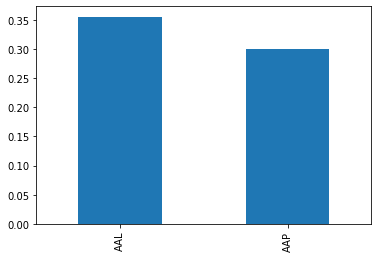

In [19]:
#We can plot the volatility of both AAL and AAP for better visualization.

test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind="bar")

**Covariance**

Covariance **measures** the **directional relationship** between the **returns** on two **assets**.

A **positive covariance** means that returns of the two **assets move together** while a **negative covariance** means they move **inversely**. Risk and volatility can be reduced in a portfolio by pairing assets that have a negative covariance.


We can calculate the covariance of **AAL** and **AAPL** by using the .cov() function.

In [20]:
# Log of Percentage change of AAL and AAPL

test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

,AAL,AAP
2013-02-08,NaN,NaN
2013-02-11,-0.019857,-0.006485
2013-02-12,-0.013227,0.002675
2013-02-13,0.026963,0.004696
2013-02-14,-0.046780,-0.001648


In [21]:
test1["AAP"].cov(test1["AAL"])

#You can notice that there is big positive covariance between AAP and AAL.

8.112189350720644e-05

**Correlation**


Correlation, in the finance and investment industries, is a statistic that **measures** the degree to which two securities move in relation to each other. Correlations are used in advanced portfolio management, computed as the correlation coefficient, which has a value that must fall between **-1.0** and **+1.0**.

You can think of correlation as a **scaled version** of **covariance**, where the values are restricted to lie between **-1** and **+1**.

A correlation of **-1** means **negative relation**, i.e, if correlation between **Asset A and Asset B** is **-1**, if **Asset A increases**, **Asset B decreases.**

A correlation of **+1** means **positive relation**, i.e, if correlation between Asset A and Asset B is** 1**, if **Asset A increases**, **Asset B increases.**

A correlation of **0** means **no relation**, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

This is calculated using the **.corr()** function.

In [22]:
#correlation between AAP and AAL

test1["AAP"].corr(test1["AAL"])

#In line with the covariance, the correlation between AAL and AAP is also positive.

0.1898978079239273

**Expected Returns**

**Expected returns** of an asset are simply the mean of percentage change in its stock prices. So, the value of expected return we obtain here are daily expected returns.

For an yearly expected return value, you will need to resample the data year-wise, as you will see further.

For **expected returns**, you need to **define weights** for the **assets** choosen.

In simpler terms, this means you need to **decide** what **percentage** of your **total money** to you want to **hold** in **each company’s stock**.

Usually this **decision** is done by using the **optimization techniques** we will discuss later but for now we will consider **random weights** for **AAP** and **AAL**.

First, let’s compute the log of percentage change.

In [23]:
# Log of Percentage change of AAL and AAPL

test2 = test.pct_change().apply(lambda x:np.log(1+x))

In [24]:
test2.head()

,AAL,AAP
2013-02-08,NaN,NaN
2013-02-11,-0.019857,-0.006485
2013-02-12,-0.013227,0.002675
2013-02-13,0.026963,0.004696
2013-02-14,-0.046780,-0.001648


**Weights**


Let’s define an array of random weights for the purpose of calculation. These weights will represent the percentage allocation of investments between these two stocks. They must add up to 1.

So, the **problem** of **portfolio optimization** is nothing but to **find the optimal values** of weights that **maximizes expected returns** while **minimizing** the **risk (standard deviation)**.

In [25]:
# Define weights for allocation

w = [0.8, 0.2]

e_r_ind = test2.mean()
e_r_ind

AAL    0.000992
AAP    0.000264
dtype: float64

The total expected return for a portfolio is given by:

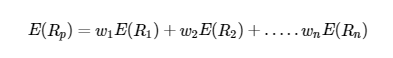

Thus, e_r, or total expected return can be calculated as:

In [26]:
# Total expected return

e_r = (e_r_ind*w).sum()
e_r

0.0008466204976852324

**7. Building an optimal risky portfolio**

it is time to create an optimal portfolio using the same concepts.

We will be using stocks from 4 companies, namely, 


You will learn to calculate the weights of assets for each one. Then, we will calculate the expected returns, minimum variance portfolio, optimal risky portfolio and efficient frontier.


You will also learn a new term called Sharpe Ratio.

In [27]:
# Closing price for each stocks

df1 = datafr_stocks[["AAL","AAP","AAPL","ABBV","ABC"]]
df1.head()

,AAL,AAP,AAPL,ABBV,ABC
2013-02-08,14.75,78.90,67.8542,36.25,46.89
2013-02-11,14.46,78.39,68.5614,35.85,46.76
2013-02-12,14.27,78.60,66.8428,35.42,46.96
2013-02-13,14.66,78.97,66.7156,35.27,46.64
2013-02-14,13.99,78.84,66.6556,36.57,46.77


**8. Covariance and Correlation matrix**


The first step is to obtain a **covariance** and **correlation matrix** to understand how different **assets** behave with **respect to each other**. When we had a 2 asset portfolio, we directly plugged in the names of the assets into **.cov(**) and **.corr()** functions.


In this case, we will need a matrix for better visualisation. This is also achieved by using the same 2 functions on our dataframe df.


Note that we perform necessary operations to display log change in prices of stocks each day.

In [28]:
# Log of percentage change for the 5 stocks

cov_matrix = df1.pct_change().apply(lambda x: np.log(1+x)).cov()

In [29]:
#The covariance between AAL and AAL, or AAP and AAP is the variance of that asset.

cov_matrix

,AAL,AAP,AAPL,ABBV,ABC
AAL,0.000506,0.000081,0.000069,0.000086,0.000073
AAP,0.000081,0.000361,0.000035,0.000068,0.000043
AAPL,0.000069,0.000035,0.000213,0.000045,0.000029
ABBV,0.000086,0.000068,0.000045,0.000283,0.000079
ABC,0.000073,0.000043,0.000029,0.000079,0.000196


The next step is to create the correlation matrix. Correlation ranges from -1 to 1.

A correlation of -1 means negative relation, i.e, if correlation between Asset
A and Asset B is -1, if Asset A increases, Asset B decreases.

A correlation of +1 means positive relation, i.e, if correlation between Asset
A and Asset B is 1, if Asset A increases, Asset B increases.

A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

In [30]:
# As you can see, an asset always has a perfectly positive correlation of 1 with itself

corr_matrix = df1.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,AAL,AAP,AAPL,ABBV,ABC
AAL,1.000000,0.189898,0.210951,0.226552,0.231444
AAP,0.189898,1.000000,0.127461,0.211677,0.163561
AAPL,0.210951,0.127461,1.000000,0.182648,0.140448
ABBV,0.226552,0.211677,0.182648,1.000000,0.337469
ABC,0.231444,0.163561,0.140448,0.337469,1.000000


**9. Portfolio Variance**

The formula for calculating portfolio variance differs from the usual formula of variance. It looks like this:


$$\sigma^2(Rp) = \sum{i=1}^{n} \sum_{j=1}^{n} w_i w_j COV(R_i, R_j) $$


Here, wi and wj denote weights of all assets from 1 to n (in our case from 1 to 4) and COV(Ri, Rj) is the covariance of the two assets denoted by i and j.


The simplest way to do this complex calculation is defining a list of weights and multiplying this list horizontally and vertically with our covariance matrix.


For this purpose, let’s define a random list of weights for all 4 assets. Remember that sum of weights should always be 1.

In [31]:
# Randomly weighted portfolio's variance

w = {'AAL': 0.1, 'AAP': 0.2, 'AAPL': 0.4, 'ABBV': 0.2, 'ABC':0.1}

In [32]:
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00010595722713412496

In [33]:
#The portfoli risk if say you have $100,000
100000*port_var

10.595722713412496

Thus we have found the portfolio variance. But for truly optimizing the portfolio, we cant plug in random weights. We will need to calculate it according to what gives us maximum expected returns.


How will you find the portfolio expected return?

**9. Portfolio expected returns**


The mean of returns (given by change in prices of asset stock prices) give us the expected returns of that asset.

The sum of all individual expected returns further multiplied by the weight of assets give us expected return for the portfolio.

Note that we use the resample() function to get yearly returns. The argument to function, ‘Y’, denotes yearly.

If we dont perform resampling, we will get daily returns, like you saw earlier in the ‘Fundamental Terms’ section.

In [34]:
df1.index = pd.to_datetime(df1.index)

In [35]:
# Yearly returns for individual companies

ind_er = df1.resample('Y', axis=0).last().pct_change().mean()

In [36]:
ind_er

AAL     0.223675
AAP     0.039974
AAPL    0.167014
ABBV    0.184144
ABC     0.077399
dtype: float64

**Portfolio returns**

In [37]:
# Portfolio returns

w = [0.1, 0.2, 0.4, 0.2,0.1]

port_er = (w*ind_er).sum()
port_er

0.14173647462495123

**Plotting the efficient frontier**

But first, lets take a look at the volatiltilty and returns of individual assets for a better understanding.

In [38]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.

ann_sd = df1.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

AAL     0.355645
AAP     0.300290
AAPL    0.230681
ABBV    0.266139
ABC     0.221231
dtype: float64

In [39]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
AAL,0.223675,0.355645
AAP,0.039974,0.300290
AAPL,0.167014,0.230681
ABBV,0.184144,0.266139
ABC,0.077399,0.221231


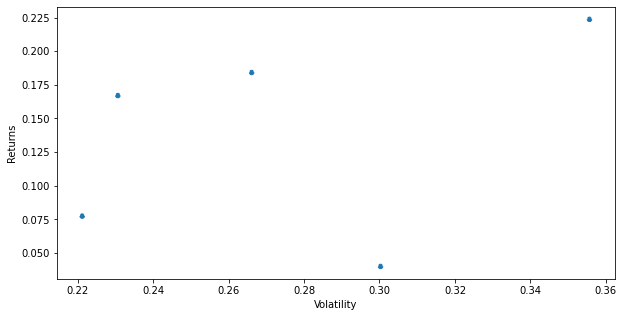

In [40]:
# Plot efficient frontier

assets.plot.scatter(x='Volatility', y='Returns', ls="--", figsize=[10,5])# , marker='o', s=10, alpha=0.3, grid=True, )

**Effecient frontier for all the first 5 stocks**

In [45]:
df2 = df1.copy()

In [46]:
df2.index = pd.to_datetime(df2.index)

In [47]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights


num_assets = len(df2.columns)
num_portfolios = 10000

In [48]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)    

In [50]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df2.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [51]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAL weight,AAP weight,AAPL weight,ABBV weight,ABC weight
0,0.151544,0.172133,0.232940,0.130843,0.181757,0.268684,0.185775
1,0.160470,0.179470,0.049502,0.063267,0.276237,0.500659,0.110335
2,0.141044,0.176693,0.119278,0.293735,0.249956,0.325924,0.011106
3,0.133028,0.157337,0.025796,0.092201,0.314067,0.254445,0.313490
4,0.144582,0.161015,0.087333,0.004761,0.352279,0.215626,0.340002


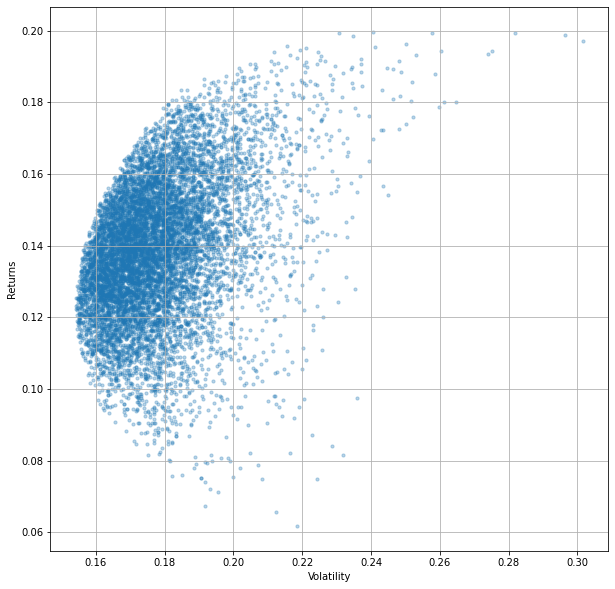

In [52]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

You can see that there are a number of portfolios with different weights, returns and volatility. Plotting the returns and volatility from this dataframe will give us the efficient frontier for our portfolio.

**How to read the Efficient Frontier?**


Each point on the line (left edge) represents an optimal portfolio of stocks that maximises the returns for any given level of risk.


The point (portfolios) in the interior are sub-optimal for a given risk level. For every interior point, there is another that offers higher returns for the same risk.


On this graph, you can also see the combination of weights that will give you all possible combinations:


Minimum volatility (left most point)

Maximum returns (top most point)

And everything in between.

In [54]:
min_vol_port = portfolios.iloc[portfolios["Volatility"].idxmin()] # idxmin() gives us the minimum value in the column specified. 
min_vol_port

Returns        0.122348
Volatility     0.154164
AAL weight     0.052226
AAP weight     0.172005
AAPL weight    0.319089
ABBV weight    0.141941
ABC weight     0.314739
Name: 1653, dtype: float64

The minimum volatility is in a portfolio where the weights of AAL, AAP, AAPL,ABBV and ABC are 5%, 17%, 31%,14% and 31% respectively. This point can be plotted on the efficient frontier

In [55]:
min_vol_port*100

Returns        12.234769
Volatility     15.416401
AAL weight      5.222574
AAP weight     17.200538
AAPL weight    31.908942
ABBV weight    14.194072
ABC weight     31.473873
Name: 1653, dtype: float64

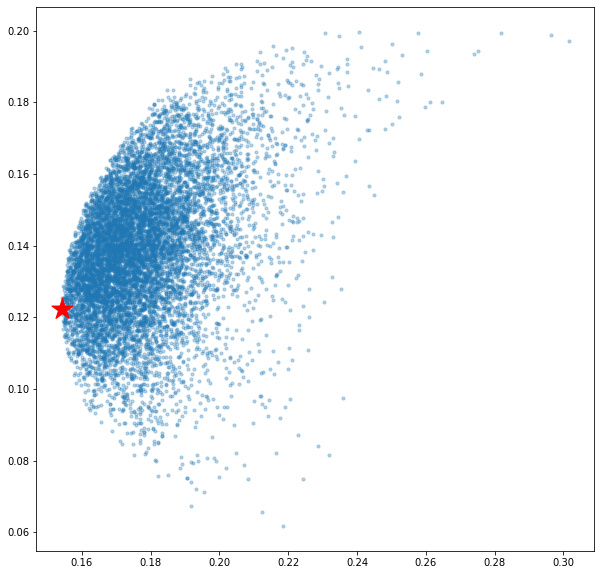

In [216]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

The red star denotes the most efficient portfolio with minimum volatility.

It is worthwhile to note that any point to the right of efficient frontier boundary is a sup-optimal portfolio.

We found the portfolio with minimum volatility, but you will notice that the return on this portfolio is pretty low. Any sensible investor wants to maximize his return, even if it is a tradeoff with some level of risk.

The question arises that how do we find this optimal risky portfolio and finally optimize our portfolio to the maximum?

This is done by using a parameter called the **Sharpe Ratio.**

**Sharpe Ratio**

The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

The risk-free rate of return is the return on an investment with zero risk, meaning it’s the return investors could expect for taking no risk.

The optimal risky portfolio is the one with the highest Sharpe ratio. The formula for this ratio is:

**Optimal Risky Portfolio**

An optimal risky portfolio can be considered as one that has highest Sharpe ratio.

Let’s find out.

In [217]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        0.178288
Volatility     0.179452
AAL weight     0.165286
AAP weight     0.006520
AAPL weight    0.437547
ABBV weight    0.353602
ABC weight     0.037045
Name: 1523, dtype: float64

In [218]:
optimal_risky_port*100

Returns        17.828812
Volatility     17.945214
AAL weight     16.528598
AAP weight      0.652049
AAPL weight    43.754710
ABBV weight    35.360194
ABC weight      3.704450
Name: 1523, dtype: float64

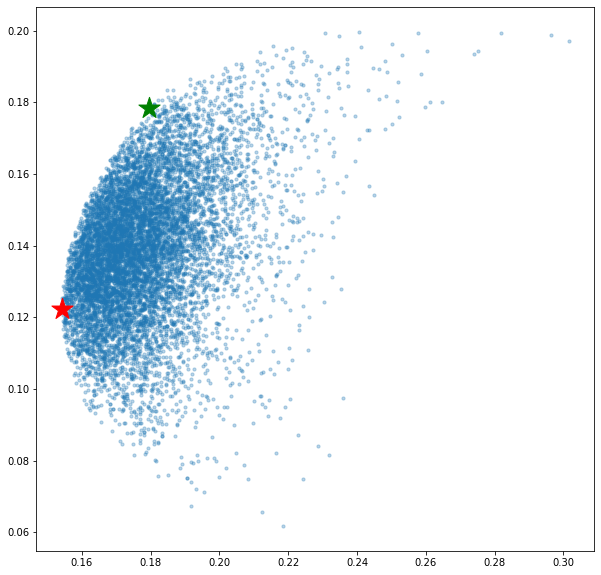

In [219]:
#We can plot this point too on the graph of efficient frontier.
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

#**Effecient frontier for all the  stocks**

In [63]:
df3 = datafr_stocks.copy()
df3.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,...,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,...,28.31,37.46,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,...,28.41,37.58,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,...,28.42,37.80,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,...,28.22,38.44,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27


In [66]:
df3.index = pd.to_datetime(df3.index)
df3.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,...,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,...,28.31,37.46,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,...,28.41,37.58,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,...,28.42,37.80,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,...,28.22,38.44,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27


In [202]:
p_ret1 = [] # Define an empty array for portfolio returns
p_vol1 = [] # Define an empty array for portfolio volatility
p_weights1 = [] # Define an empty array for asset weights

In [203]:
num_assets1 = len(df3.columns)
num_portfolios1 = 1000000

In [204]:
# Yearly returns for all stocks

ind_er1 = df3.resample('Y', axis=0).last().pct_change().mean()

In [205]:
ind_er1

A       0.062601
AAL     0.223675
AAP     0.039974
AAPL    0.167014
ABBV    0.184144
          ...   
XYL     0.169124
YUM     0.020739
ZBH     0.059548
ZION    0.145894
ZTS     0.183614
Length: 470, dtype: float64

In [206]:
# Log of percentage change for the all the stocks

cov_matrix1 = df3.pct_change().apply(lambda x: np.log(1+x)).cov()

In [207]:
cov_matrix1.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
A,0.000259,0.000102,0.000054,0.000062,0.000092,0.000050,0.000088,0.000078,0.000092,0.000097,...,0.000054,0.000087,0.000062,0.000072,0.000090,0.000093,0.000075,0.000078,0.000102,0.000070
AAL,0.000102,0.000506,0.000081,0.000069,0.000086,0.000073,0.000081,0.000077,0.000104,0.000106,...,0.000080,0.000089,0.000044,0.000074,0.000106,0.000087,0.000093,0.000075,0.000121,0.000080
AAP,0.000054,0.000081,0.000361,0.000035,0.000068,0.000043,0.000065,0.000047,0.000050,0.000056,...,0.000040,0.000053,0.000044,0.000047,0.000069,0.000061,0.000065,0.000054,0.000084,0.000044
AAPL,0.000062,0.000069,0.000035,0.000213,0.000045,0.000029,0.000048,0.000051,0.000066,0.000088,...,0.000032,0.000059,0.000041,0.000044,0.000064,0.000052,0.000061,0.000052,0.000062,0.000049
ABBV,0.000092,0.000086,0.000068,0.000045,0.000283,0.000079,0.000090,0.000055,0.000076,0.000073,...,0.000044,0.000072,0.000055,0.000061,0.000074,0.000067,0.000054,0.000082,0.000075,0.000089


In [208]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets1)
    weights = weights/np.sum(weights)
    p_weights1.append(weights)
    returns = np.dot(weights, ind_er1) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret1.append(returns)
    var = cov_matrix1.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol1.append(ann_sd)   

In [209]:
data1 = {'Returns':p_ret1, 'Volatility':p_vol1}

In [210]:
for counter, symbol in enumerate(df3.columns.tolist()):
    #print(counter, symbol)
    data1[symbol+' weight'] = [w[counter] for w in p_weights1]

In [211]:
portfolios1  = pd.DataFrame(data1)
portfolios1.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,A weight,AAL weight,AAP weight,AAPL weight,ABBV weight,ABC weight,ABT weight,ACN weight,...,XL weight,XLNX weight,XOM weight,XRAY weight,XRX weight,XYL weight,YUM weight,ZBH weight,ZION weight,ZTS weight
0,0.092206,0.125844,0.001422,0.002367,0.002807,0.000872,0.002314,0.003883,0.004283,0.004179,...,0.001976,0.000640,0.001176,0.002283,0.003285,0.002088,0.000161,0.001168,0.002489,0.001801
1,0.090040,0.125994,0.004308,0.002288,0.003613,0.001525,0.002526,0.000446,0.001555,0.001540,...,0.001808,0.001955,0.002109,0.002272,0.000090,0.000662,0.000091,0.002480,0.001253,0.002706
2,0.088951,0.126720,0.003783,0.000484,0.000007,0.000651,0.001059,0.004218,0.000147,0.001533,...,0.002313,0.003286,0.002036,0.003290,0.000292,0.002580,0.002693,0.004110,0.003278,0.003058
3,0.089293,0.126572,0.002626,0.002873,0.003777,0.001241,0.001636,0.000581,0.004129,0.003004,...,0.002989,0.003565,0.002964,0.000633,0.000252,0.001495,0.002514,0.000911,0.000049,0.000868
4,0.083941,0.126672,0.002884,0.003846,0.004039,0.002688,0.002558,0.003703,0.003879,0.003980,...,0.003731,0.001379,0.002821,0.000460,0.000954,0.001901,0.002867,0.003624,0.002686,0.001936


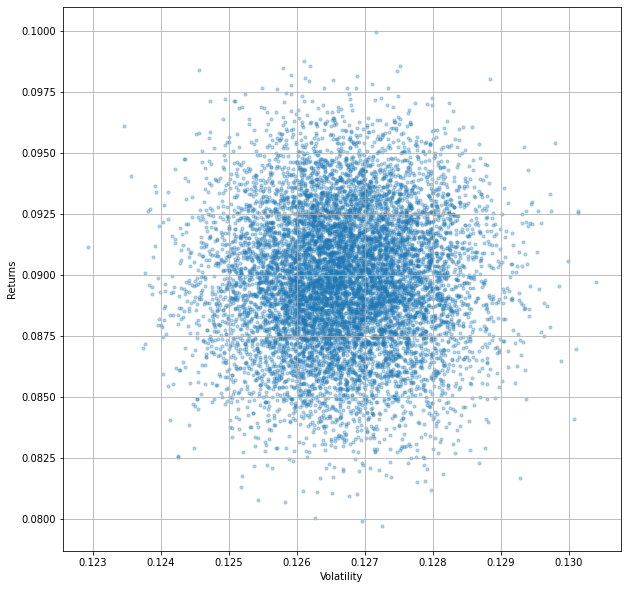

In [213]:
# Plot efficient frontier
portfolios1.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [220]:
min_vol_port1 = portfolios1.iloc[portfolios1["Volatility"].idxmin()] # idxmin() gives us the minimum value in the column specified. 
min_vol_port1

Returns        0.091139
Volatility     0.122936
A weight       0.002053
AAL weight     0.002280
AAP weight     0.001445
                 ...   
XYL weight     0.003957
YUM weight     0.004002
ZBH weight     0.002398
ZION weight    0.002835
ZTS weight     0.003748
Name: 4879, Length: 472, dtype: float64

In [221]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port1 = portfolios1.iloc[((portfolios1['Returns']-rf)/portfolios1['Volatility']).idxmax()]
optimal_risky_port1

Returns        0.098380
Volatility     0.124557
A weight       0.001092
AAL weight     0.001555
AAP weight     0.002102
                 ...   
XYL weight     0.000248
YUM weight     0.001633
ZBH weight     0.002607
ZION weight    0.000642
ZTS weight     0.002976
Name: 8703, Length: 472, dtype: float64

In [150]:
portfolios2 = pd.DataFrame(data1.values()).T
portfolios2.tail()

,0,1,2,3,4,5,6,7,8,9,...,462,463,464,465,466,467,468,469,470,471
19995,0.088164,NaN,0.002851,0.003442,0.000825,0.000247,0.003278,0.003239,0.003800,0.001770,...,0.001884,0.000862,0.002439,0.003514,0.003817,0.002748,0.001018,0.002380,0.002559,0.002817
19996,0.089713,NaN,0.001831,0.003482,0.000182,0.003444,0.003548,0.001063,0.002988,0.003089,...,0.001156,0.000231,0.001985,0.004086,0.001300,0.003380,0.000596,0.002522,0.000810,0.002511
19997,0.090721,NaN,0.002269,0.002067,0.000262,0.002048,0.004168,0.003021,0.001066,0.001002,...,0.003580,0.002817,0.003909,0.003742,0.004200,0.003472,0.000263,0.002697,0.001405,0.004191
19998,0.086809,NaN,0.003791,0.001775,0.002531,0.001373,0.002167,0.001005,0.002182,0.003932,...,0.000088,0.002778,0.000034,0.002514,0.002083,0.003375,0.001729,0.003963,0.001047,0.002072
19999,0.091466,NaN,0.002837,0.002091,0.004116,0.000026,0.003366,0.001055,0.000188,0.001217,...,0.003149,0.001015,0.002352,0.000645,0.001643,0.004150,0.000281,0.000631,0.000474,0.000233


In [154]:
all_colums = ["returns","volatility"] + df3.columns.tolist()
#all_colums

In [167]:
p_columns = list(portfolios2.columns)
#p_columns

In [179]:
for i,v in enumerate(all_colums):
  #print(i,v)
  pass

In [184]:
all_columns_dict = {}
for i,v in enumerate(p_columns):
  for k,d in enumerate(all_colums):
    if i == k:
      all_columns_dict[v] = d
    else:
      pass


In [190]:
portfolios3 = portfolios2.rename(all_columns_dict, axis=1)
portfolios3.head()

,returns,volatility,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,0.086804,0.128260,0.002486,0.001843,0.003542,0.001861,0.000153,0.003322,0.002970,0.002843,...,0.000826,0.000657,0.000462,0.002042,0.000069,0.001955,0.000160,0.003541,0.000436,0.001686
1,0.092696,0.126004,0.000568,0.002980,0.002990,0.000335,0.002019,0.003042,0.000581,0.002347,...,0.001786,0.001359,0.000519,0.004079,0.001450,0.002463,0.004027,0.003306,0.002655,0.002020
2,0.087775,0.125486,0.004192,0.002634,0.002295,0.002633,0.000930,0.000086,0.000407,0.003224,...,0.002144,0.003356,0.001773,0.001569,0.000309,0.004192,0.001163,0.001315,0.001912,0.003853
3,0.091300,0.128463,0.000234,0.000590,0.003778,0.001980,0.003067,0.002276,0.002426,0.003912,...,0.004041,0.003585,0.002830,0.000225,0.001385,0.001920,0.002833,0.002383,0.002021,0.002789
4,0.085571,0.127658,0.002971,0.002845,0.002803,0.003494,0.003755,0.002848,0.000739,0.003917,...,0.001858,0.001313,0.000231,0.000963,0.000702,0.001213,0.001892,0.001459,0.002529,0.003620


**What if i delete the volatility with nan values**

In [198]:
portfolios5 = portfolios3.dropna()

In [200]:
portfolios5

,returns,volatility,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,0.086804,0.128260,0.002486,0.001843,0.003542,0.001861,0.000153,0.003322,0.002970,0.002843,...,0.000826,0.000657,0.000462,0.002042,0.000069,0.001955,0.000160,0.003541,0.000436,0.001686
1,0.092696,0.126004,0.000568,0.002980,0.002990,0.000335,0.002019,0.003042,0.000581,0.002347,...,0.001786,0.001359,0.000519,0.004079,0.001450,0.002463,0.004027,0.003306,0.002655,0.002020
2,0.087775,0.125486,0.004192,0.002634,0.002295,0.002633,0.000930,0.000086,0.000407,0.003224,...,0.002144,0.003356,0.001773,0.001569,0.000309,0.004192,0.001163,0.001315,0.001912,0.003853
3,0.091300,0.128463,0.000234,0.000590,0.003778,0.001980,0.003067,0.002276,0.002426,0.003912,...,0.004041,0.003585,0.002830,0.000225,0.001385,0.001920,0.002833,0.002383,0.002021,0.002789
4,0.085571,0.127658,0.002971,0.002845,0.002803,0.003494,0.003755,0.002848,0.000739,0.003917,...,0.001858,0.001313,0.000231,0.000963,0.000702,0.001213,0.001892,0.001459,0.002529,0.003620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.087034,0.126365,0.001768,0.000313,0.001760,0.001612,0.001102,0.001244,0.000152,0.001531,...,0.000535,0.004272,0.003990,0.001759,0.002321,0.000375,0.001550,0.003245,0.000533,0.003184
9996,0.092235,0.127522,0.002771,0.001122,0.001039,0.003945,0.002656,0.001675,0.004091,0.000424,...,0.000374,0.002747,0.000260,0.002273,0.002749,0.001145,0.003070,0.003713,0.001583,0.003278
9997,0.090868,0.127094,0.000385,0.002260,0.001474,0.003118,0.000722,0.002104,0.000955,0.002267,...,0.000230,0.003067,0.001846,0.000102,0.001746,0.003432,0.000664,0.003473,0.000812,0.000154
9998,0.089622,0.126891,0.002471,0.003193,0.002615,0.002304,0.001796,0.000063,0.000357,0.002431,...,0.000582,0.000826,0.003857,0.003867,0.002548,0.000585,0.002195,0.003193,0.002933,0.003512


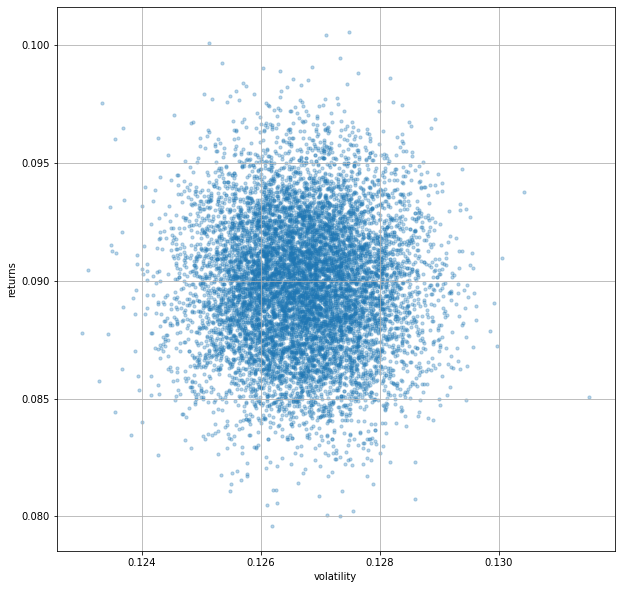

In [201]:
# Plot efficient frontier
portfolios5.plot.scatter(x='volatility', y='returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])